In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.ma.extras import average
import seaborn as sns

In [8]:
df = pd.read_csv('Bank_Churn.csv', sep=",")
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  str    
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  str    
 4   Gender           10000 non-null  str    
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), str(3)
memory usage: 1015.8 KB


In [10]:
df.describe(include="all")

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


clean

In [38]:
df.isna().sum

<bound method DataFrame.sum of       CustomerId  Surname  CreditScore  Geography  Gender    Age  Tenure  \
0          False    False        False      False   False  False   False   
1          False    False        False      False   False  False   False   
2          False    False        False      False   False  False   False   
3          False    False        False      False   False  False   False   
4          False    False        False      False   False  False   False   
...          ...      ...          ...        ...     ...    ...     ...   
9995       False    False        False      False   False  False   False   
9996       False    False        False      False   False  False   False   
9997       False    False        False      False   False  False   False   
9998       False    False        False      False   False  False   False   
9999       False    False        False      False   False  False   False   

      Balance  NumOfProducts  HasCrCard  IsActiveMember 

In [39]:
df["Gender"].fillna(df["Gender"].mode())

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: str

In [10]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop_duplicates()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: title={'center': 'Geography Distribution'}, xlabel='Geography'>

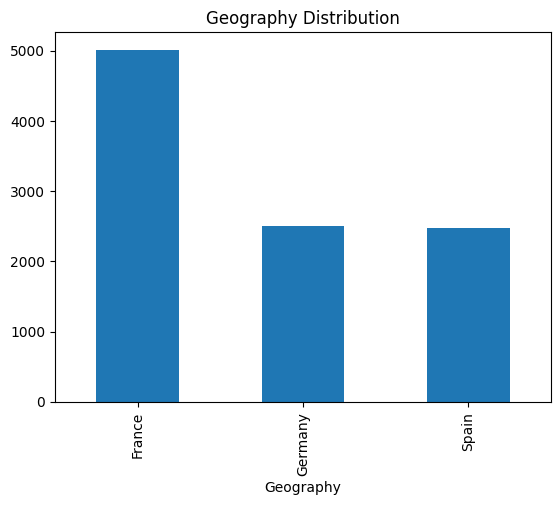

In [15]:
df["Geography"].value_counts().plot(kind="bar", title="Geography Distribution of customers")

In [14]:
df_exited = df[df["Exited"] == 0]
df_exited.head(20)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
10,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
11,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
12,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0
13,15691483,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0


In [26]:
df_exited["Gender"].value_counts()

Gender
Male      4559
Female    3404
Name: count, dtype: int64

In [18]:
df_france = df[df["Geography"] == "France"]
df_spain = df[df["Geography"] == "Spain"]
df_germany = df[df["Geography"] == "Germany"]

In [22]:
average_balance = df_france["Balance"].median()
average_balance

np.float64(62153.5)

In [ ]:
average_balance = df_spain["Balance"].median()
average_balance

In [ ]:
average_balance = df_germany["Balance"].median()
average_balance

In [33]:
print(df.columns)

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='str')


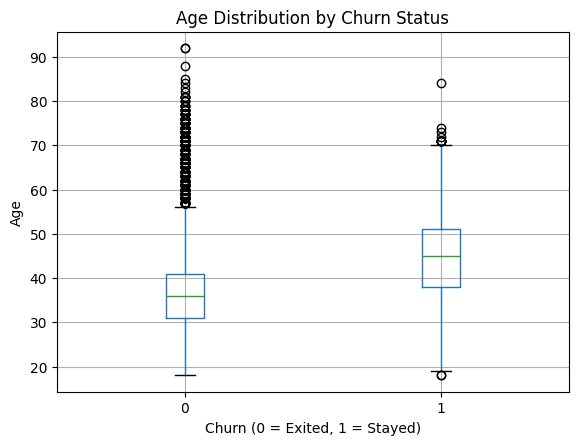

In [13]:
df[["Age", "Exited"]].boxplot(by="Exited")
plt.title("Age Distribution by Churn Status")
plt.suptitle("")

plt.xlabel("Churn (0 = Exited, 1 = Stayed)")
plt.ylabel("Age")
plt.show()

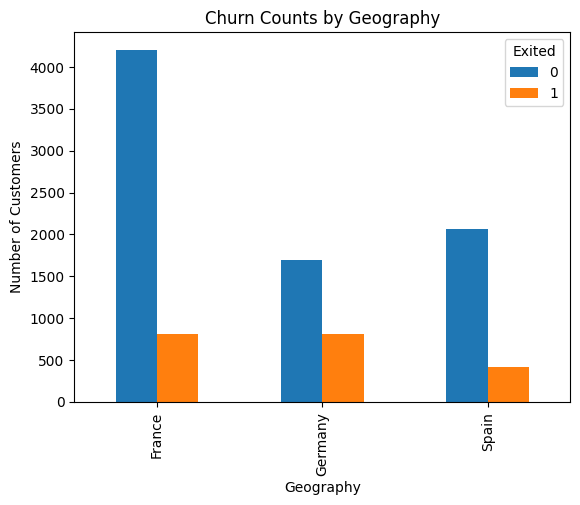

In [15]:
df.groupby(["Geography", "Exited"]).size().unstack().plot(kind="bar", stacked=False)
plt.title("Churn Counts by Geography")
plt.xlabel("Geography")
plt.ylabel("Number of Customers")
plt.show()

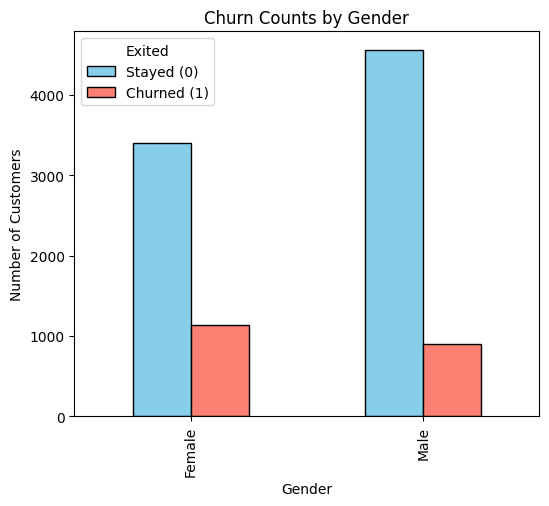

In [17]:
gender_churn_counts = df.groupby(["Gender","Exited"]).size().unstack(fill_value=0)
gender_churn_counts.plot(kind="bar", figsize=(6,5), color=["skyblue","salmon"], edgecolor="black")
plt.title("Churn Counts by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.legend(title="Exited", labels=["Stayed (0)", "Churned (1)"])
plt.show()

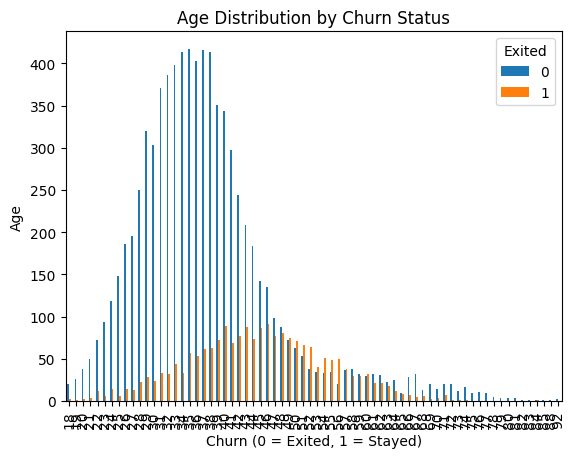

In [32]:
df.groupby(["Age", "Exited"]).size().unstack().plot(kind="bar", stacked=False)
plt.title("Age Distribution by Churn Status")
plt.suptitle("")

plt.xlabel("Churn (0 = Exited, 1 = Stayed)")
plt.ylabel("Age")
plt.show()

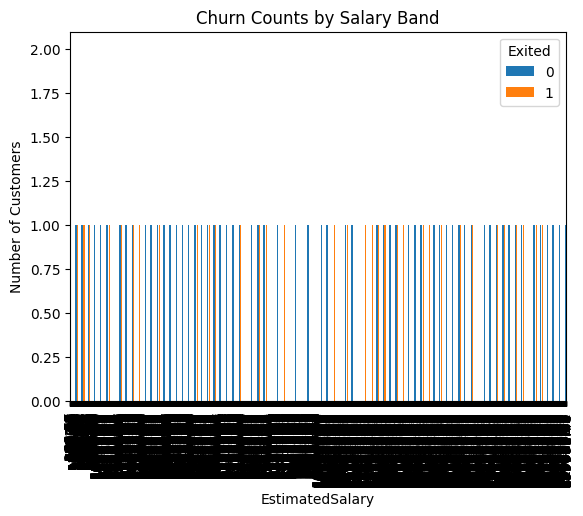

In [31]:
df.groupby(["EstimatedSalary","Exited"]).size().unstack().plot(kind="bar", stacked=False)
plt.title("Churn Counts by Salary Band")
plt.xlabel("EstimatedSalary")
plt.ylabel("Number of Customers")
plt.show()

Churn can be predicted using the variables in the data, the variables are Age distribution, Geography, Gender and Estimated salary.

What attributes are more common among churners than non-churners?

From the graph and analysis, the churners are more likely to be female, elderly, from France and have a higher salary.

In [40]:
print("Overall Demographics Analysis")
print("-" * 30)

geo_dist = df['Geography'].value_counts(normalize=True) * 100
print(f"Geography Distribution (%):\n{geo_dist.to_string()}\n")

gender_dist = df['Gender'].value_counts(normalize=True) * 100
print(f"Gender Distribution (%):\n{gender_dist.to_string()}\n")

age_stats = df['Age'].describe()[['mean', '50%', 'min', 'max']]
print(f"Age Statistics:\n{age_stats.to_string()}\n")

cs_stats = df['CreditScore'].describe()[['mean', '50%']]
print(f"Credit Score Statistics:\n{cs_stats.to_string()}\n")

salary_stats = df['EstimatedSalary'].describe()[['mean', '50%']]
print(f"Estimated Salary Statistics:\n{salary_stats.to_string()}\n")

tenure_dist = df['Tenure'].value_counts(normalize=True).sort_index() * 100
print(f"Tenure Distribution (%):\n{tenure_dist.to_string()}")


Overall Demographics Analysis
------------------------------
Geography Distribution (%):
Geography
France     50.14
Germany    25.09
Spain      24.77

Gender Distribution (%):
Gender
Male      54.57
Female    45.43

Age Statistics:
mean    38.9218
50%     37.0000
min     18.0000
max     92.0000

Credit Score Statistics:
mean    650.5288
50%     652.0000

Estimated Salary Statistics:
mean    100090.239881
50%     100193.915000

Tenure Distribution (%):
Tenure
0      4.13
1     10.35
2     10.48
3     10.09
4      9.89
5     10.12
6      9.67
7     10.28
8     10.25
9      9.84
10     4.90


What do the overall demographics of the bank's customers look like?

The bank's customer base is concentrated in three European countries:
France: ~50.1% (The largest group)
Germany: ~25.1%
Spain: ~24.8%

The distribution is slightly skewed towards male customers:
Male: ~54.6%
Female: ~45.4%

Customers range from 18 to 92 years old, with the following key stats:
Average (Mean) Age: 38.9 years
Median Age: 37 years
Most customers are in their late 30s.

Average Credit Score: ~650 (Median: 652), which typically falls in the "Fair" to "Good" range.
Average Estimated Salary: ~$100,090 (Median: ~$100,194).
The salaries are quite evenly distributed around this mark

The length of time customers have been with the bank (tenure) is fairly evenly distributed between 1 and 9 years (~10% for each year), with fewer customers having a tenure of 0 years (~4.1%) or 10 years (~4.9%).

In [41]:
behavior_cols = ['Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
geo_behavior = df.groupby('Geography')[behavior_cols].mean()

geo_behavior['CustomerCount'] = df.groupby('Geography').size()

print("Account Behavior by Geography (Mean values):")
print(geo_behavior)

print("\nMedian Balance by Geography:")
print(df.groupby('Geography')['Balance'].median())

zero_balance = df[df['Balance'] == 0].groupby('Geography').size() / df.groupby('Geography').size() * 100
print("\nPercentage of customers with Zero Balance (%):")
print(zero_balance)

Account Behavior by Geography (Mean values):
                 Balance  NumOfProducts  HasCrCard  IsActiveMember    Exited  \
Geography                                                                      
France      62092.636516       1.530913   0.706621        0.516753  0.161548   
Germany    119730.116134       1.519729   0.713830        0.497409  0.324432   
Spain       61818.147763       1.539362   0.694792        0.529673  0.166734   

           CustomerCount  
Geography                 
France              5014  
Germany             2509  
Spain               2477  

Median Balance by Geography:
Geography
France      62153.50
Germany    119703.10
Spain       61710.44
Name: Balance, dtype: float64

Percentage of customers with Zero Balance (%):
Geography
France     48.224970
Germany          NaN
Spain      48.405329
dtype: float64


Is there a difference between German, French, and Spanish customers in terms of account behavior?

The analysis shows that German customers have significantly different account behavior than French and Spanish customers:
- High Balances: German customers have a much higher median balance (~119k) compared to France and Spain (~62k).
- Zero Balances: 0% of German customers have zero balance, while ~48% of French and Spanish customers do.
- High Churn: Germany has double the churn rate (~32.4%) of France and Spain (~16%).
- Activity: German customers are slightly less active.

1.  Account Balances:
    Germany: Customers maintain significantly higher balances, with a median of **~119,703**. Notably, **0%** of German customers in the dataset have a zero balance.
    France & Spain**: Both regions have much lower median balances (**~62,000**), and approximately **48%** of customers in these countries have a zero balance.

2.  Churn Rates:
    Germany: Exhibits a much higher churn rate (**32.4%**) compared to France (16.2%) and Spain (16.7%). German customers are twice as likely to leave the bank despite having higher balances.

3.  Customer Activity:
    Active Membership: German customers are slightly less active (**49.7%**) compared to their counterparts in France (51.6%) and Spain (53.0%).
    Product Usage: The average number of products (~1.5) and credit card ownership (~70-71%) are consistent across all three countries.

In [42]:
def get_segment(row):
    if row['Age'] >= 50 and row['Geography'] == 'Germany':
        return 'High-Risk Senior (Germany)'
    elif row['Balance'] == 0:
        return 'Zero Balance Customer'
    elif row['NumOfProducts'] > 1 and row['IsActiveMember'] == 1:
        return 'Engaged Multi-Product'
    else:
        return 'General'

df['Segment'] = df.apply(get_segment, axis=1)

segment_analysis = df.groupby('Segment').agg({
    'Exited': 'mean',
    'Balance': 'mean',
    'CustomerId': 'count'
}).rename(columns={'Exited': 'Churn Rate', 'CustomerId': 'Count'})

print(segment_analysis)

                            Churn Rate        Balance  Count
Segment                                                     
Engaged Multi-Product         0.152975  119581.210595   1059
General                       0.229488  119811.122746   4924
High-Risk Senior (Germany)    0.612500  120681.056150    400
Zero Balance Customer         0.138236       0.000000   3617


What types of segments exist within the bank's customers?

Based on the data attributes, several key customer segments can be identified. These segments are defined by their demographic profiles, financial behavior, and risk (churn) levels:

1. Demographic Segments
 •Young Professionals (<30 years): Typically lower churn rates, often just starting their banking relationship.
 •Established Middle-Aged (30-50 years): The largest segment (late 30s average). These customers are the core of the bank's business.
 •Seniors (50+ years): A higher-risk segment in this dataset. Customers over 50 tend to have significantly higher churn rates.

2. Geographic & Financial Segments
 •The "German Power" Segment:◦Profile: High-balance customers (Median ~119k).◦Behavior: 100% of these customers have a non-zero balance.◦Risk: Surprisingly high churn rate (~32.4%), suggesting they are more price-sensitive or dissatisfied with service despite their wealth.
 •The "French/Spanish Zero-Balance" Segment:◦Profile: Nearly 48% of customers in France and Spain maintain a zero balance.◦Behavior: Lower median balances (~62k).◦Risk: Much lower churn rates (~16%) compared to German customers.

3. Engagement Segments
 •Single-Product Users: Customers with only 1 product. Analysis usually shows they are more likely to churn than those with multiple products.
 •Active vs. Inactive Members:◦Active Members: Higher engagement, lower churn.◦Inactive Members: Higher risk of churn; approximately 50% of the customer base falls into this category.

4. Risk Segments (High Churn Probability)
 •High-Risk Segment: Seniors (50+) in Germany. This intersection represents one of the highest churn probabilities in the dataset.
 •Low-Risk Segment: Young (<30) active members in France or Spain with multiple products.